https://www.codingame.com/training/hard/11-puzzle

In [47]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path: sys.path.append(module_path)
from overwrite_input import *
init_data('38.txt');

In [48]:
import sys
import math
from typing import Dict, Tuple
from queue import PriorityQueue
from dataclasses import dataclass, field

def log(*args):
    print(*args, file=sys.stderr, flush=True)

def draw(p: Dict):
    for i in range(3):
        log(' '.join([str(p[i, j]).ljust(2) for j in range(4)]))


zero_at = 0, 0
picture = {}
for row in range(3):
    for col, tile in enumerate(input().split()):
        t = int(tile)
        picture[(row, col)] = t
        if t == 0: zero_at = (row, col)
orig_zero_at = zero_at
draw(picture)



1  3  10 8 
7  11 5  0 
6  9  4  2 


In [49]:
zero_at = orig_zero_at

@dataclass(order=True)
class Step:
    cost: int
    picture: Dict = field(compare=False)
    zero_at: Tuple = field(compare=False)
    steps: str = field(compare=False)
dirs = {'v':(-1,0),'^':(1,0),'>':(0,-1),'<':(0,1)}

target_signature = ''.join(map(str, range(12)))
signature = lambda pic: ''.join(map(str, pic.values()))
# diff = lambda pic: sum([abs(loc[0] - (tile // 4)) + abs(loc[1] - (tile % 4)) for loc, tile in pic.items()])
# diff = lambda pic: sum([abs(loc[0] * 4 + loc[1] - tile) for loc, tile in pic.items()])
diff = lambda pic: sum([abs(loc[0] - (tile // 4)) ** 2 + abs(loc[1] - (tile % 4)) ** 2 for loc, tile in pic.items()])

# A*
winning_steps = ''
visited = set()
q: PriorityQueue[Step] = PriorityQueue()
diff_chart_v3 = []

step_count_chart = []
cost_chart = []
diff_chart = []

root = Step(diff(picture), picture, zero_at, '')
q.put(root)
visited.add(signature(picture))
while not q.empty():
    crt = q.get()

    zr, zc = crt.zero_at
    for direction in dirs:
        dr, dc = dirs[direction]
        moved_r, moved_c = zr + dr, zc + dc
        if not 0 <= moved_r < 3 or not 0 <= moved_c < 4:
            continue

        # Do the move
        next_zero_at = moved_r, moved_c
        next_pic = crt.picture.copy()
        next_pic[crt.zero_at] = next_pic[next_zero_at]
        next_pic[next_zero_at] = 0

        next_sig = signature(next_pic)
        if next_sig in visited:
            continue

        # Diff to target pic
        next_diff = diff(next_pic)
        diff_chart_v3.append(next_diff)

        next_steps = crt.steps + direction
        if next_diff == 0:
            winning_steps = next_steps
            q = PriorityQueue()
            break
        elif len(next_steps) >= 49:
            continue

        step_count_chart.append(len(next_steps))
        diff_chart.append(next_diff)
        cost_chart.append(len(next_steps) + next_diff)

        # Next step
        q.put(Step(
            len(next_steps) + next_diff,
            next_pic,
            next_zero_at,
            next_steps
        ))
        visited.add(next_sig)

for direction in winning_steps:
    zr, zc = zero_at
    dr, dc = dirs[direction]
    zero_at = zr + dr, zc + dc
    print(f"{zero_at[0]} {zero_at[1]}")



0 3
0 2
0 1
1 1
1 0
2 0
2 1
2 2
1 2
1 1
2 1
2 2
1 2
1 3
0 3
0 2
0 1
1 1
1 2
2 2
2 3
1 3
1 2
0 2
0 3
1 3
1 2
2 2
2 3
1 3
0 3
0 2
0 1
1 1
1 0
0 0
0 1
0 2
1 2
1 1
1 0
0 0
0 1
1 1
2 1
2 0
1 0
0 0


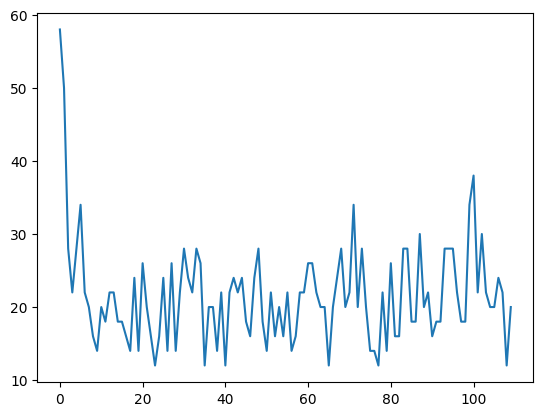

In [57]:
import matplotlib.pyplot as plt

plt.plot(diff_chart_v3[::100])
plt.show()